# Statistics Pratical Implementation

A) Measures of central tendency
1. Mean
2. Median
3. Mode

In [1]:
# Method 1 : using numoy method

ages = [23,24,32,45,12,43,67,45,32,56,32]  # without outliers

import numpy as np

print(np.mean(ages))   # for mean
print(np.median(ages))  # for median


37.36363636363637
32.0


In [2]:
# dataset with outliers
ages = [23,24,32,45,12,43,67,45,32,56,32,100]

print(np.mean(ages))   # for mean
print(np.median(ages))  # for median

# you can notice there is a huge difference in mean but median is not affected so much

42.583333333333336
37.5


In [3]:
# Method 2 : using statistics method

ages = [23,24,32,45,12,43,67,45,32,56,32,]  # without outliers

import statistics

print(statistics.mean(ages))   # for mean
print(statistics.median(ages))  # for median
print(statistics.mode(ages))    # for mode


37.36363636363637
32
32


In [4]:
ages = [23,24,32,45,12,43,67,45,32,56,32,120]  # with outliers

import statistics

print(statistics.mean(ages))   # for mean
print(statistics.median(ages))  # for median
print(statistics.mode(ages))    # for mode

44.25
37.5
32


# Methods to find outliers

1. Five number summary method (Quartile method)

<Axes: >

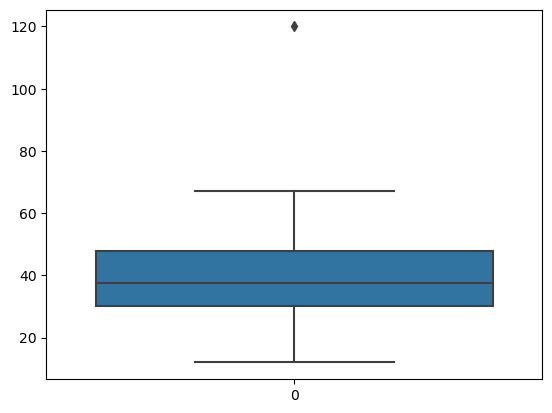

In [5]:
# Box plot for Five number summary 

import seaborn as sns

sns.boxplot(ages)  # simple box plot


<Axes: >

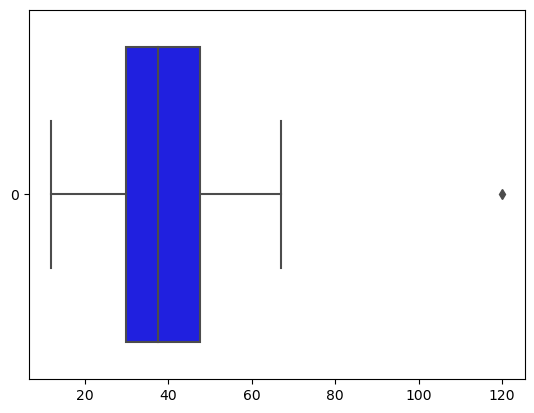

In [6]:
# you can addd features to it like colors, change orientation etc.

sns.boxplot(ages, color = 'blue', orient='h') 


# Five number summary:-
    
1. Minimum
2. First Quartile (Q1,25%)
3. Median
4. Third Quartile (Q3,75)
5. Maximum

In [7]:
# step 1:- Find Q1 and Q3

import numpy as np      # library for percentile

q1,q3 = np.percentile(ages,[25,75])  # find percentile value at 25 and 75% of entire dataset
print(q1,q3)

print("Q1 =",q1)
print("Q3 =",q3)


30.0 47.75
Q1 = 30.0
Q3 = 47.75


In [8]:
# step 2 :- to find range for outlier whether it is outlier or not
# quartile (iqr) = higher fence - lower fence
# range = [lower fence , Higher fence]
# if the data is outside this range then it is consider to be an outlier

IQR = q3 - q1                      # finding IQR
lower_fence = q1 - 1.5*(IQR)       # finding lower fence
higher_fence = q3 + 1.5*(IQR)      # finding higher fence
print(lower_fence,higher_fence)

print("Lower fence :",lower_fence)
print("Higher fence :",higher_fence)


3.375 74.375
Lower fence : 3.375
Higher fence : 74.375


# Measures of Dispersion

1. Variance
2. Standard Deviation

# 1. Variance

1. Population Variance (N)
2. Sample Variance     (n)

In [9]:
# 1. Population Variance

import numpy as np

np.var(ages)  # this is population variance which divides by N
print("Population Variance :",np.var(ages))

# 2. Sample Variance

import statistics

# statistics.pvariance(ages) # for population variance
statistics.variance(ages) # this is sample variance which is divided by n-1
print("Sample Variance :",statistics.variance(ages))

Population Variance : 729.0208333333334
Sample Variance : 795.2954545454545


In [10]:
# Creating a function for Variance

# for population variance
def pop_variance(data):
    N = len(data)
    mean = sum(data)/N
    deviation = [(x - mean) ** 2 for x in data]
    variance = sum(deviation)/N
    return variance

# for sample variance
def samp_variance(data):
    n = len(data)
    mean = sum(data)/n
    deviation = [(x - mean) ** 2 for x in data]
    variance = sum(deviation)/(n-1)
    return variance

# comman function for variance with data and dof(degree of freedom) as input parameters
def variance(data,dof=0):
    n = len(data)
    mean = sum(data)/n
    deviation = [(x - mean) ** 2 for x in data]
    variance = sum(deviation)/(n-dof)
    return variance


In [11]:
pop_variance(ages)     # calling function for population variance


729.0208333333334

In [12]:
samp_variance(ages)     # calling function for sample variance


795.2954545454545

In [13]:
variance(ages,dof = 0)   # calling comman variance function with having input parameter as data and dof
# if dof is 0 then its population variance

729.0208333333334

In [14]:
variance(ages,dof=1)   # calling comman variance function with having input parameter as data and dof
# if dof is 1 then its sample variance

795.2954545454545

In [15]:
# population variance using statistic library
statistics.pvariance(ages) # for population variance

729.0208333333334

# 2. Standard Deviation

In [16]:
# we know the formula for standdard deviation {σ^2 = variance}

import math
standard_deviation = math.sqrt(statistics.pvariance(ages))

print("Standard Deviation σ = ",standard_deviation)

Standard Deviation σ =  27.000385799712813


# Histogram and PDF

<Axes: ylabel='Count'>

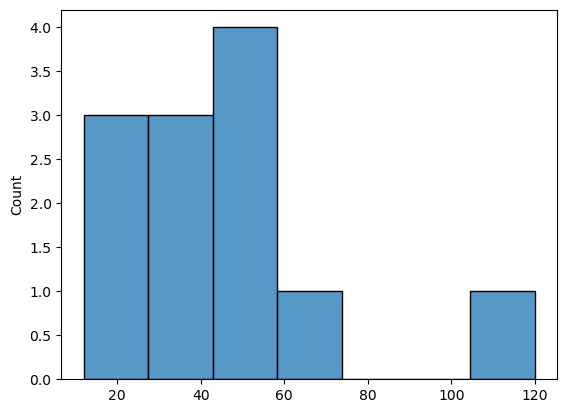

In [17]:
# Histogram

import seaborn as sns
sns.histplot(ages)     # simple histogram plot and bin size is been taken by computer

<Axes: ylabel='Count'>

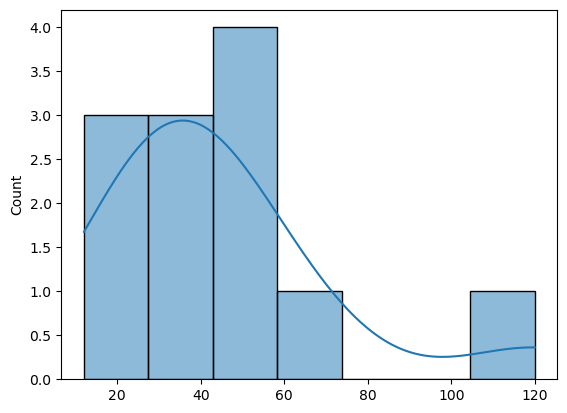

In [18]:
# histogram with kernal density estimator

sns.histplot(ages,kde = True) 

In [19]:
# lets take one more example from iris dataset

df = sns.load_dataset('iris')   # load the iris dataset

In [20]:
df.head()   # displaying top 5 value

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Axes: xlabel='sepal_length', ylabel='Count'>

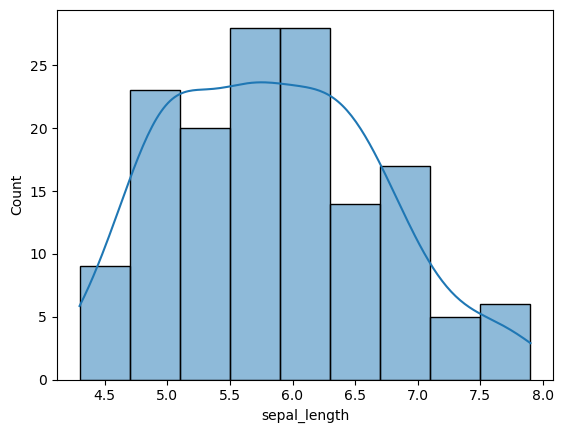

In [21]:
# ploting histogram for sepal length
sns.histplot(df['sepal_length'],kde= True)  # still its not normal or guassian distribution 

<Axes: xlabel='sepal_width', ylabel='Count'>

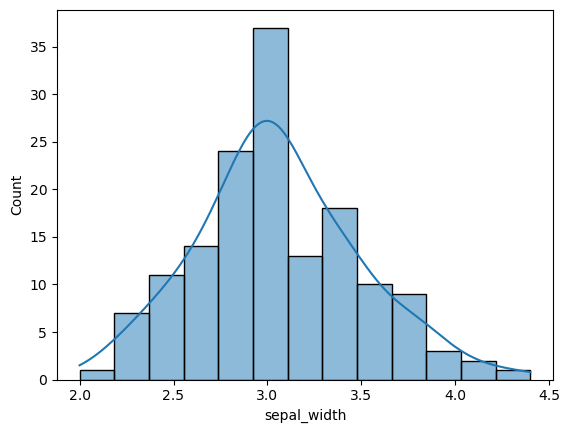

In [22]:
# to check wheather the plot is normally distributed or not, we will use Q-Q plot

sns.histplot(df['sepal_width'],kde = True) # we say this plot as normal or gussian distributed based on shape
# but are still not sure it is perfectly gussian or normal distribution, still we have not verified

<Axes: xlabel='petal_length', ylabel='Count'>

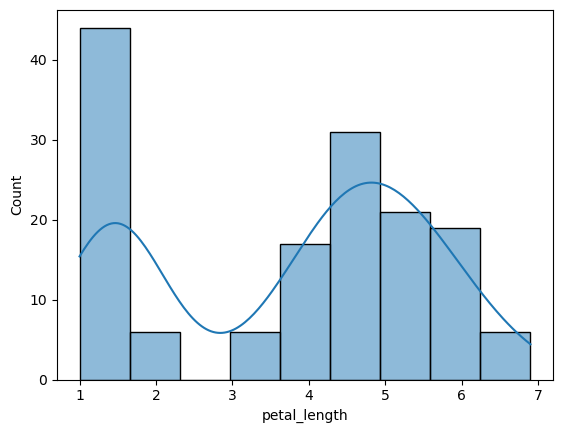

In [23]:
sns.histplot(df['petal_length'], kde=True)

<Axes: xlabel='petal_width', ylabel='Count'>

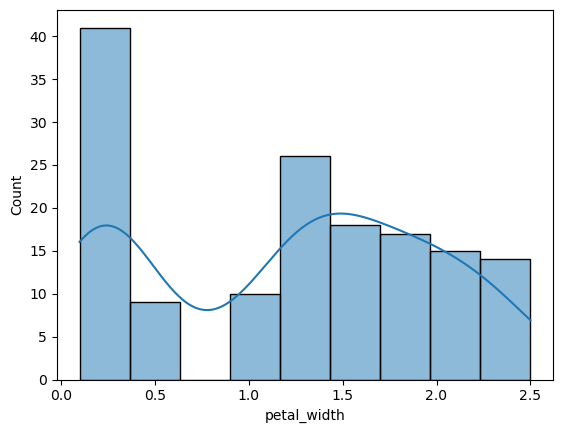

In [24]:
sns.histplot(df['petal_width'], kde=True)

# How to create dataset of any distribution

# 1. Normal distributed dataset 

In [25]:
#  normal distributed dataset 
# syntax : np.random.normal( mean_value, Standard_deviation, size of dataset required)

import numpy as np
s = np.random.normal(10,2,1000)

print(s)

[ 7.76300018  7.58363549  8.70683897  6.50243587  9.60656814 10.35755793
  6.64564993  9.05885998  9.43835416 11.66389955  9.78138524  7.45147633
 10.44820051  8.71234683  6.91489173  9.32643496  7.24728884  7.8584862
 10.3182422   8.73303962  7.48515805 10.72858159  8.73835233  6.94656916
 11.19477265 11.35088842  7.4905456  11.24013488 10.64361791 11.80443188
  4.10628099  7.66347424 10.41304065 10.44401273 13.02958132 11.40664751
 10.35456977 11.75604912  8.81770629  5.55754038  5.02827693 12.30507704
 14.18227375  8.64860968 12.15236778  8.29629547  8.84072862  9.11897813
 12.70661403 10.09096003 10.31912017  3.95817218  9.60435837 10.18107206
 12.32783556  6.47642304 10.23507339 12.45554836 13.88510912 13.02367255
  7.83869668 10.69279065 11.13657639  9.5813892  11.42955009 12.67415562
 11.66800295  7.81981893  6.55441697  7.12623954  7.58076777 11.60900964
 11.18355569 12.00712754  7.56846882 10.6115175   6.57019475  9.24223361
 10.180226    8.6262901   9.86172719 10.02680317 13.

<Axes: ylabel='Count'>

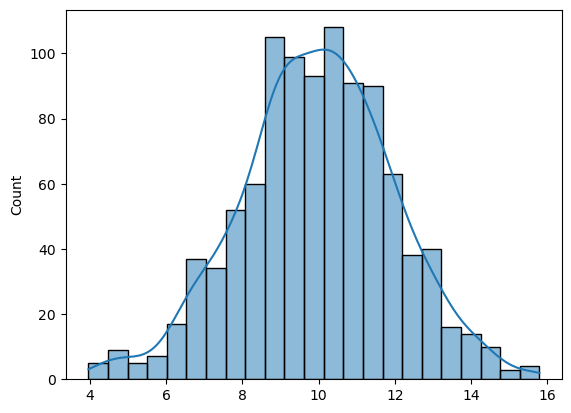

In [26]:
sns.histplot(s,kde=True) # mean =10 , std = 2, perfect normal or gussian plot

# 2. Log Normal distribution (Power Law distribution)

In [27]:
p = np.random.lognormal(3,1,100)
print(p)

[ 44.0365051   23.04964646  26.77821653  73.6931135   20.37067036
  18.3642933   19.70336434  22.55108814  14.95798936  27.91109264
   4.32243578   6.25266081   6.05478429  18.52716246  15.15296523
  48.03732315  25.33109836  16.83943626   5.47062024  43.39050403
  63.81530885  56.91647151  27.48451897  13.13597267  54.46621139
  12.65303558  12.76474822   4.4372294   21.91309195  91.78118848
  31.4651755    8.19487762   8.40648727  21.67859778   4.64567215
   6.01124959  13.70782677  16.32649488   5.6988609    7.60990851
   2.92338234  30.16957391 330.08140421  54.61038821  18.03258652
   6.03681624   7.97379083 113.22688742  29.90741646  71.77164605
  10.05988947  71.88897054  36.66368666   7.99462851  93.16859009
  17.98355819  10.20125812   2.16728127  10.19911372  12.08194081
  40.25339029  14.50899594  12.46481111  28.06858439  10.43406791
  76.40056389   4.16567414  39.35405834  11.11567639  31.72533115
  52.56850084   7.85872298   4.94788445  12.30202147   7.93994136
  61.34481

<Axes: ylabel='Count'>

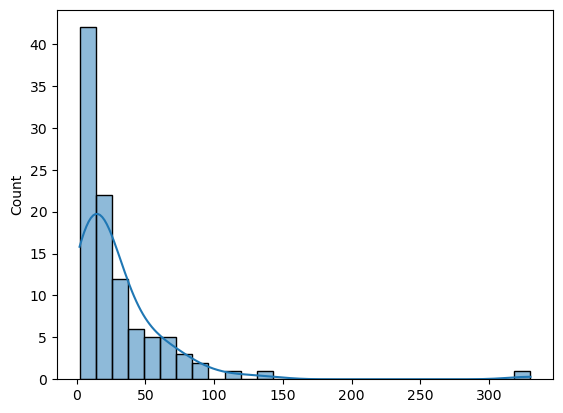

In [28]:
sns.histplot(p,kde=True)

if you apply log on this variable then, entire distribution transform to Normal Distribution

<Axes: ylabel='Count'>

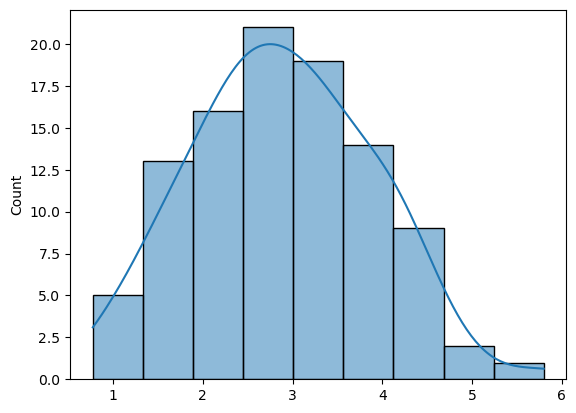

In [29]:
# applying log on above variable 'p'

sns.histplot(np.log(p),kde=True) # log Normal distribution Transform to Normal or gussian distribution

# Q-Q Plot

Check whether Distribution is Normal or not?
check whether Distribution is logNormal or not?

In [30]:
# if you wnat to check wheather features is gussian or normal distributed
# Q-Q plot

import matplotlib.pyplot as plt
import scipy.stats as stat
import pylab

def plot_data(sample):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    sns.histplot(sample,kde=True)
    plt.subplot(1,2,2)
    stat.probplot(sample,dist='norm',plot=pylab)
    plt.show()

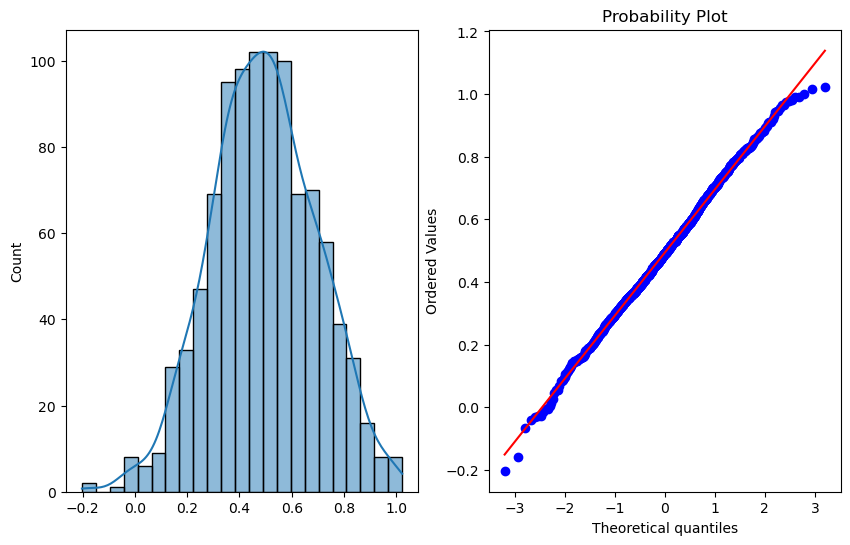

In [31]:
# create a normal distributed data
s = np.random.normal(0.5,0.2,1000)
plot_data(s)  

# this function compares both the plot that is histogram of given population or sample data and
# probablity plot

# Inside probablity plot it also compare sample data with normal distribution and 
# if this plot shows the straight line then your sample distribution is Normal or Gussian distribution
# if this plot does not shows the straight line then your sample distribution is not Normal or Gussian distribution


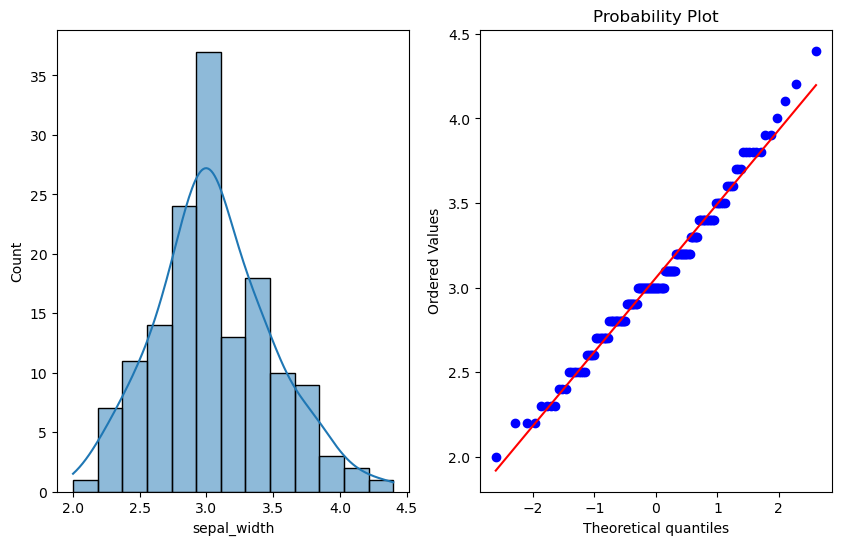

In [32]:
plot_data(df['sepal_width']) # Q-Q plot

# proabality plot follows the straight line so it is normal distribution

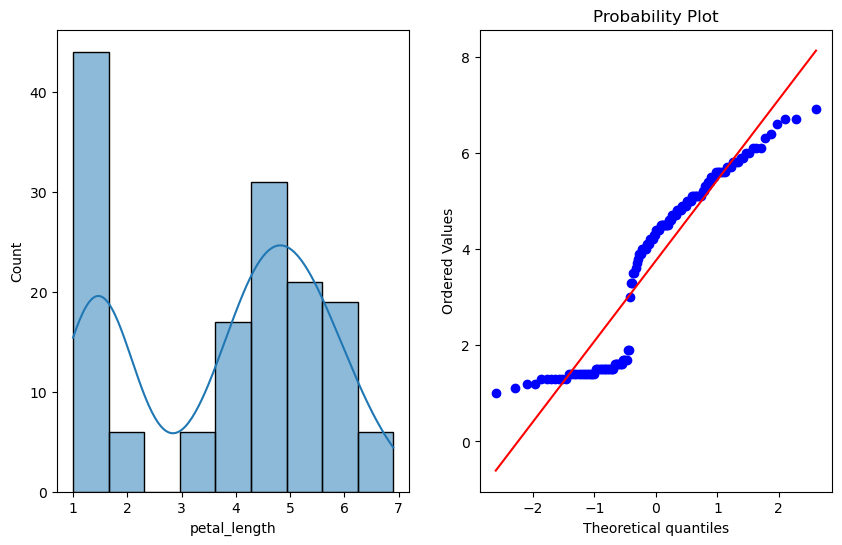

In [33]:
plot_data(df['petal_length'])  # QQ plot

# as you can notice that in proability plot our sample data does not follow the 
# straight line (normal distribution) therfore our given sample data is not a normal or gussian 
# distribution or dataset

# Q-Q plot for lognormal distribution

check whether Distribution is logNormal or not?

In [34]:
# if you wnat to check wheather features is log normal distributed or not
# Q-Q plot

import matplotlib.pyplot as plt
import scipy.stats as stat
import pylab

def plot_data_log(sample):          
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    sns.histplot(sample,kde=True)
    plt.subplot(1,2,2)
    stat.probplot(np.log(sample),dist='norm',plot=pylab)
    plt.show()

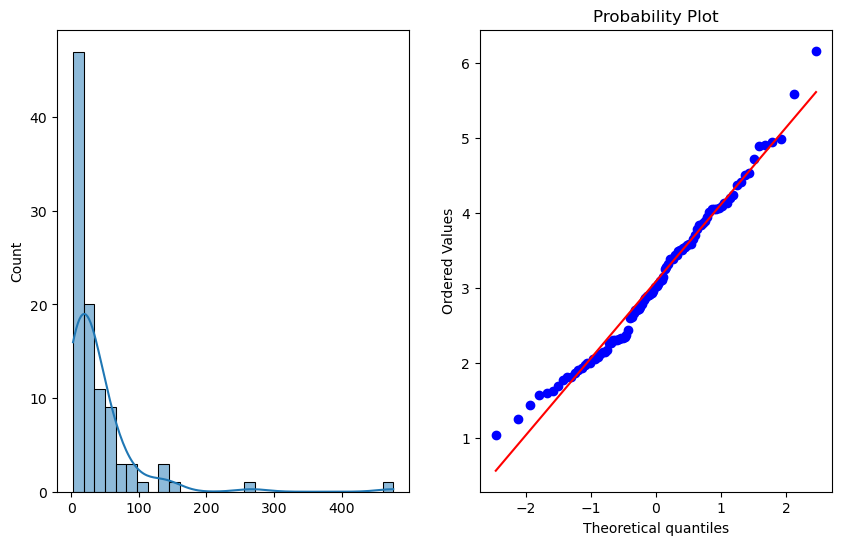

In [35]:
p = np.random.lognormal(3,1,100)  # sample data (log normal data)
plot_data_log(p)                  # Q-Q plot function for log normal distribution

# proabality plot follows the straight line so it is log normal distribution

# Pearson and Spearman Rank Correlation

In [36]:
df = sns.load_dataset('tips')  # tips dataset present in sns library just like iris dataset

In [37]:
df.head()  # displaying top 5 dataset

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [38]:
import pandas as pd
df.corr()  # it show correaltion in table form , here it take the data from both person and spearmen

C:\Users\Dhruv Patel\AppData\Local\Temp\ipykernel_14084\736063709.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()  # it show correaltion in table form , here it take the data from both person and spearmen


,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


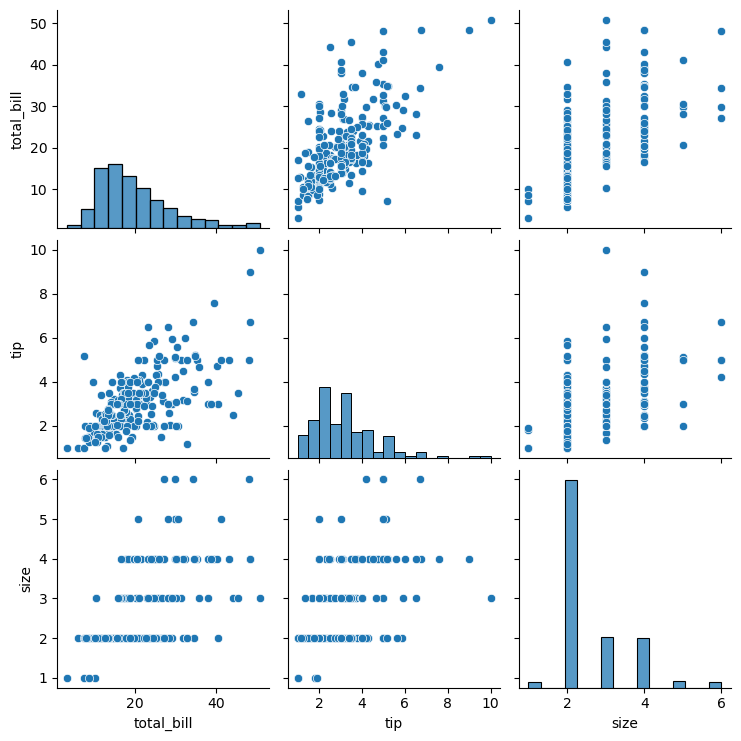

In [39]:
sns.pairplot(df)  # show correlation in graphical form

In [41]:
df.shape

(244, 7)